In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/NonDemented/31 (7).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/NonDemented/30 (20).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/NonDemented/31 (36).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/NonDemented/32 (63).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/NonDemented/30 (10).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/NonDemented/31 (68).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/NonDemented/27 (88).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/NonDemented/32 (27).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/NonDemented/28 (49).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/NonDemented/27.jpg
/kaggl

/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/NonDemented/nonDem2288.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/NonDemented/nonDem1984.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/NonDemented/nonDem575.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/NonDemented/nonDem2401.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/NonDemented/nonDem1771.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/NonDemented/nonDem2462.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/NonDemented/nonDem1757.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/NonDemented/nonDem1152.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/NonDemented/nonDem1101.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Da

/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/NonDemented/nonDem1244.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/NonDemented/nonDem2062.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/NonDemented/nonDem424.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/NonDemented/nonDem1254.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/NonDemented/nonDem1401.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/NonDemented/nonDem1820.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/NonDemented/nonDem1693.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/NonDemented/nonDem513.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/NonDemented/nonDem2055.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dat

/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/VeryMildDemented/verymildDem1273.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/VeryMildDemented/verymildDem134.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/VeryMildDemented/verymildDem333.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/VeryMildDemented/verymildDem861.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/VeryMildDemented/verymildDem1164.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/VeryMildDemented/verymildDem533.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/VeryMildDemented/verymildDem425.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/VeryMildDemented/verymildDem1044.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/VeryMildDemented

In [2]:
import matplotlib.pyplot as plt
import PIL
import os
import tensorflow as tf

In [3]:
train_loc = "../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train"
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_loc,
    validation_split = 0.3,
    subset="training",
    image_size=(200, 200),
    batch_size=32,
    seed=42
)

valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_loc, 
    validation_split = 0.3,
    subset="validation",
    image_size=(200, 200),
    batch_size=32,
    seed=42
)

Found 5121 files belonging to 4 classes.
Using 3585 files for training.
Found 5121 files belonging to 4 classes.
Using 1536 files for validation.


In [4]:
# ND: No Dementia
# VMID: Very Mild Dementia
# MID: Mild Dementia
# MOD: Moderate Dementia

classes = ["ND", "VMID", "MID", "MOD"]

train_dataset.class_names = classes
valid_dataset.class_names = classes

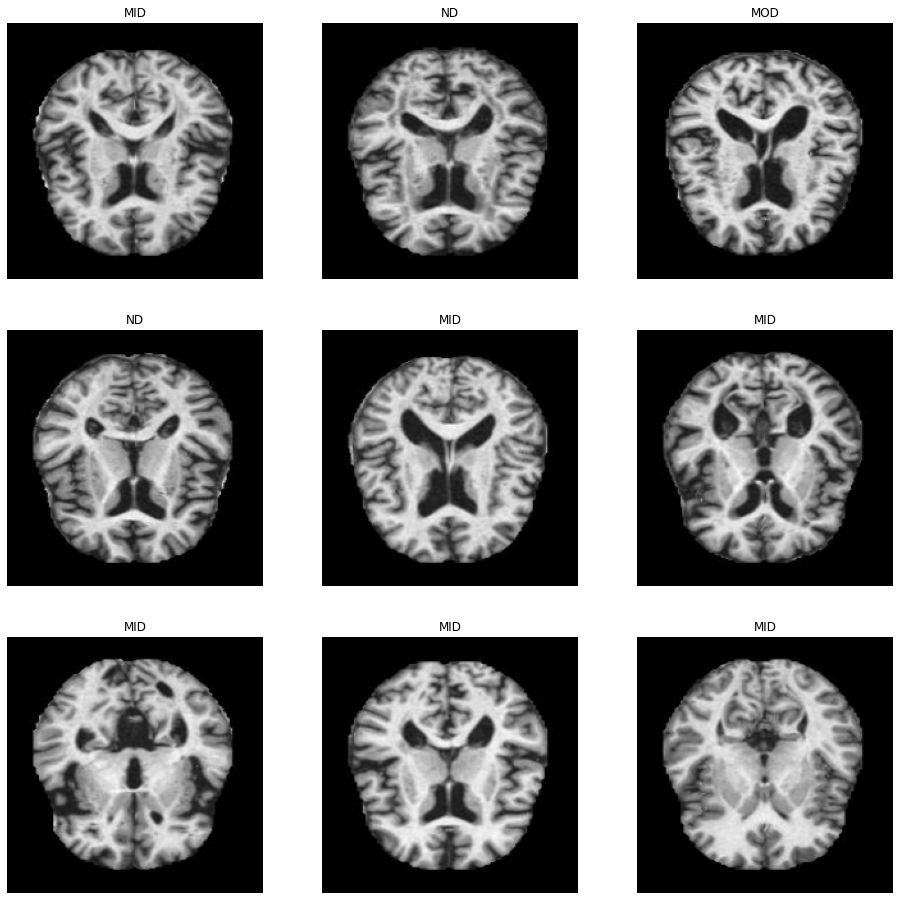

In [5]:
plt.figure(figsize=(16, 16))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_dataset.class_names[labels[i]])
        plt.axis("off")

In [6]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
valid_dataset = valid_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [7]:
import tensorflow as tf

In [36]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

moss = tf.keras.Sequential()

moss.add(tf.keras.applications.resnet50.ResNet50(weights = 'imagenet', input_shape=(200, 200, 3), include_top=False))

moss.add(tf.keras.layers.GlobalAveragePooling2D())

moss.add(tf.keras.layers.Dense(4, activation="softmax"))

In [37]:
moss.compile(optimizer = tf.keras.optimizers.SGD(), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [38]:
for layer in moss.layers[0].layers:
    if layer.name == "conv5_block1_0_conv":
        break
    layer.trainable=False

In [39]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = moss.fit(train_dataset, validation_data=valid_dataset, epochs=5, callbacks=[lr_scheduler])

Epoch 1/5
113/113 [==============================] - 20s 175ms/step - loss: 0.7577 - accuracy: 0.6667 - val_loss: 4.8840 - val_accuracy: 0.3516
Epoch 2/5
113/113 [==============================] - 19s 167ms/step - loss: 0.1901 - accuracy: 0.9437 - val_loss: 0.8917 - val_accuracy: 0.6556
Epoch 3/5
113/113 [==============================] - 19s 168ms/step - loss: 0.0264 - accuracy: 0.9980 - val_loss: 0.3541 - val_accuracy: 0.8783
Epoch 4/5
113/113 [==============================] - 19s 167ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.2356 - val_accuracy: 0.9134
Epoch 5/5
113/113 [==============================] - 19s 167ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.2075 - val_accuracy: 0.9238


In [40]:
test_loc = "../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test"
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_loc,
    image_size=(200, 200),
    batch_size=32
)

test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

Found 1279 files belonging to 4 classes.


In [41]:
val = moss.evaluate(test_dataset)
print(val)

48/48 [==============================] - 2s 52ms/step - loss: 54.5780 - accuracy: 0.5046
[54.57795333862305, 0.5045573115348816]
